<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/main/TALLER%20/EVALUACION/JHENY_EDITH_QUISPE_CHINCHERCOMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df1=pd.read_csv('index_1.csv')
df2=pd.read_csv('index_2.csv')
df_unido = pd.concat([df1, df2], ignore_index=True)
df_unido

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
...,...,...,...,...,...,...
3893,2025-03-23,2025-03-23 14:55:46,cash,NaN,30.0,Cappuccino
3894,2025-03-23,2025-03-23 15:15:36,card,NaN,25.0,Irish whiskey
3895,2025-03-23,2025-03-23 17:59:25,card,NaN,28.0,Super chocolate
3896,2025-03-23,2025-03-23 18:01:33,card,NaN,28.0,Vanilla with Irish whiskey


In [2]:
df_unido['card'] = df_unido['card'].fillna("Sin tarjeta")

In [3]:
print(df_unido.info())
print("-------------------------------------------")
print(df_unido.describe())
print("-------------------------------------------")
print(df_unido.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3898 non-null   object 
 1   datetime     3898 non-null   object 
 2   cash_type    3898 non-null   object 
 3   card         3898 non-null   object 
 4   money        3898 non-null   float64
 5   coffee_name  3898 non-null   object 
dtypes: float64(1), object(5)
memory usage: 182.8+ KB
None
-------------------------------------------
            money
count  3898.00000
mean     31.38060
std       5.06461
min      15.00000
25%      27.92000
50%      32.82000
75%      35.76000
max      40.00000
-------------------------------------------
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-0

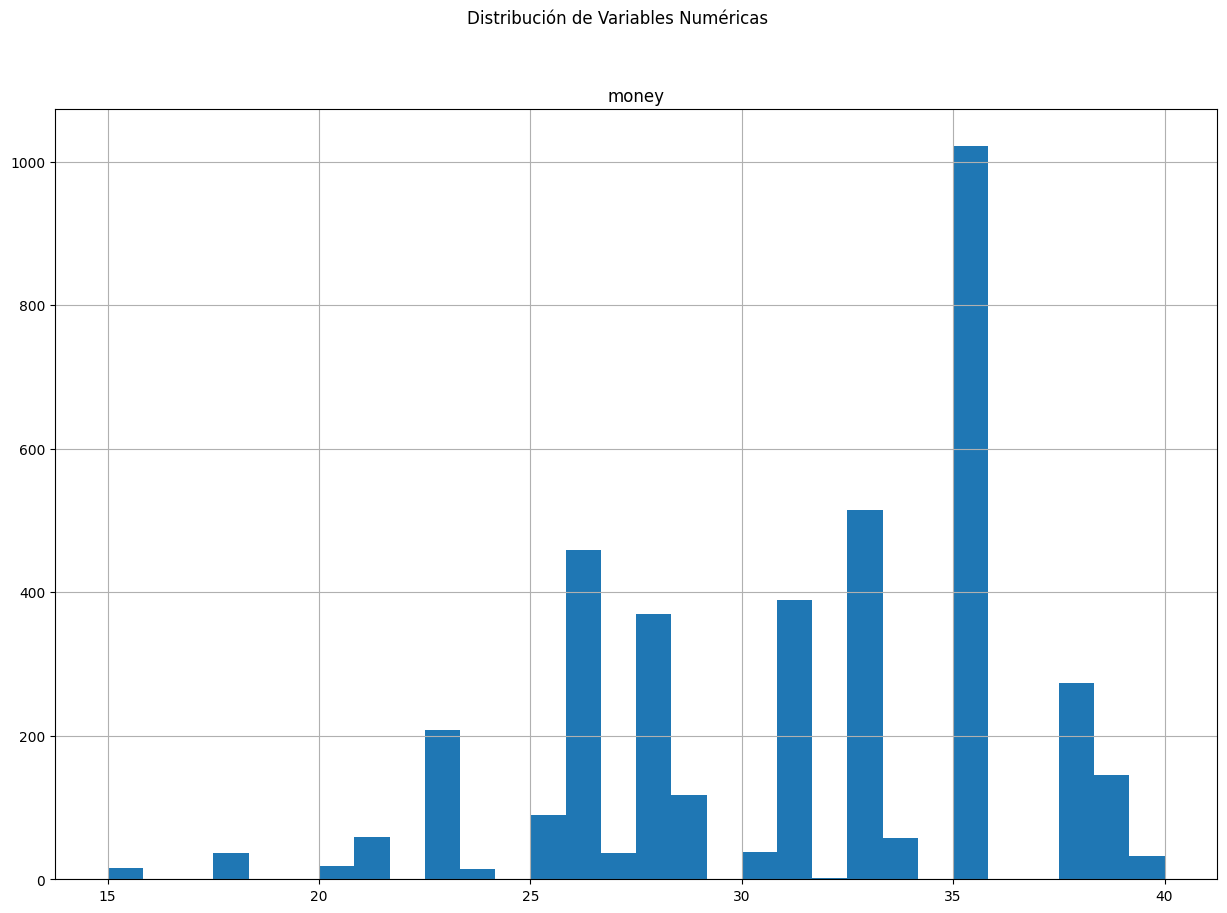

In [4]:
df_unido.hist(bins=30, figsize=(15,10))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()


/tmp/ipython-input-5-3861005367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_unido, x='cash_type', palette='Set2')


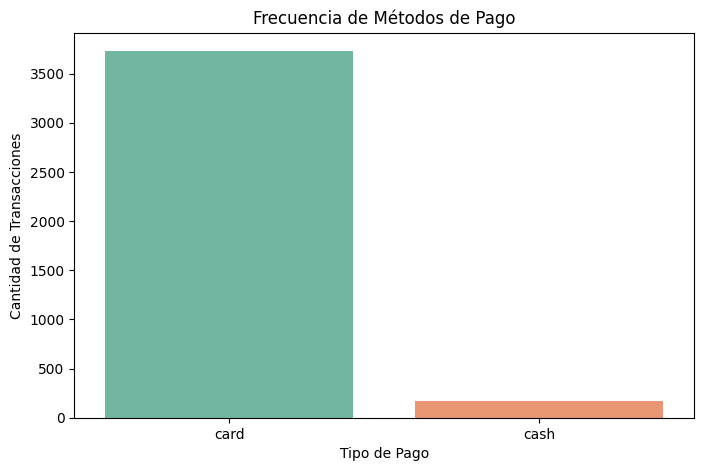

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_unido, x='cash_type', palette='Set2')
plt.title('Frecuencia de Métodos de Pago')
plt.xlabel('Tipo de Pago')
plt.ylabel('Cantidad de Transacciones')
plt.show()

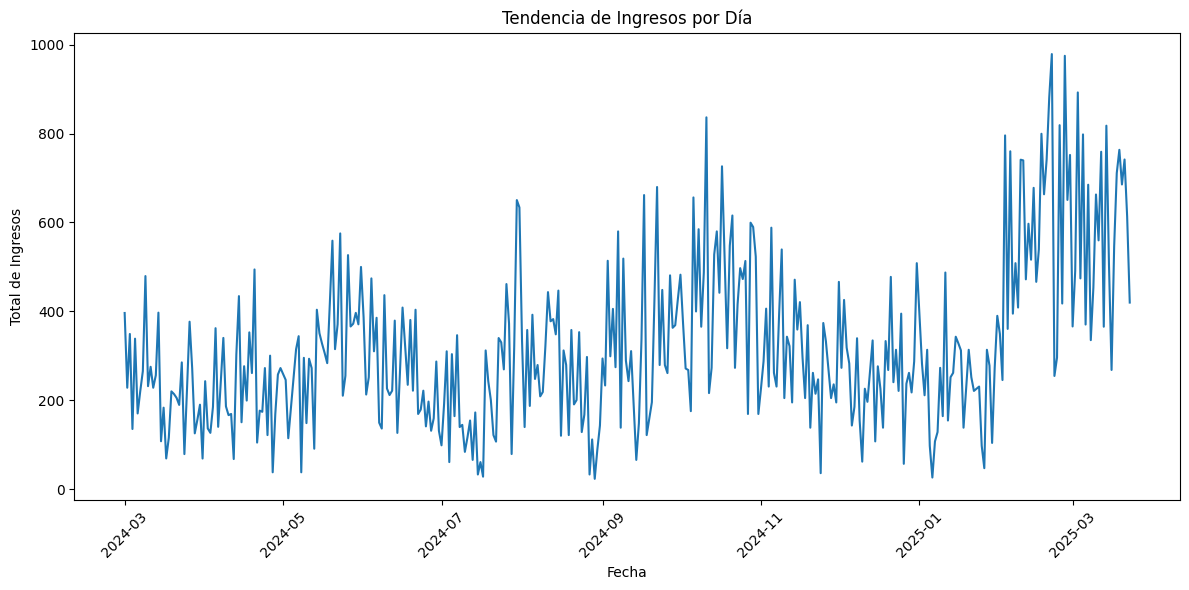

In [6]:
df_unido['date'] = pd.to_datetime(df_unido['date'])
ventas_por_dia = df_unido.groupby('date')['money'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=ventas_por_dia, x='date', y='money')
plt.title('Tendencia de Ingresos por Día')
plt.xlabel('Fecha')
plt.ylabel('Total de Ingresos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


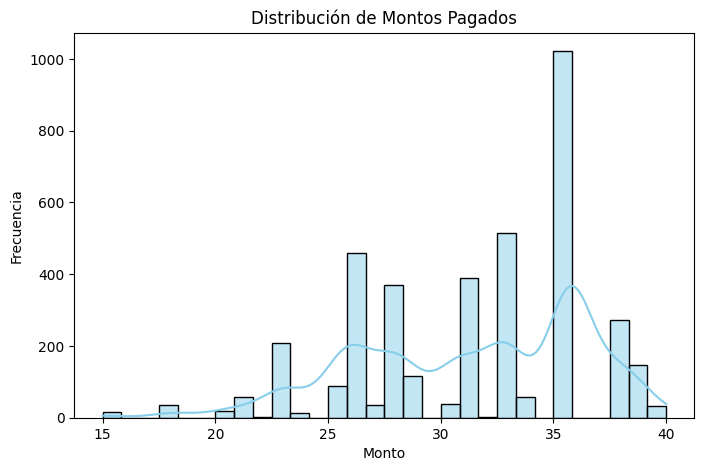

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df_unido['money'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Montos Pagados')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()


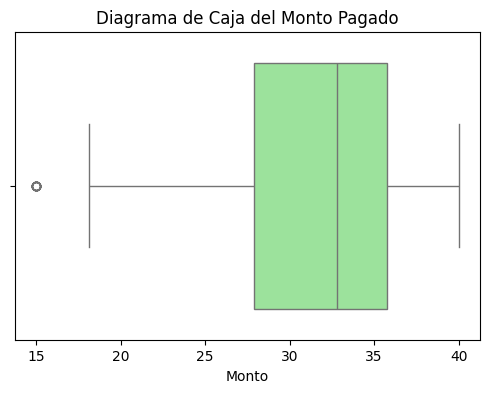

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_unido['money'], color='lightgreen')
plt.title('Diagrama de Caja del Monto Pagado')
plt.xlabel('Monto')
plt.show()

In [9]:
df_unido['datetime'] = pd.to_datetime(df_unido['datetime'], format='mixed', errors='coerce')
df_unido['datetime'] = pd.to_datetime(df_unido['datetime'])
df_unido['mes'] = df_unido['datetime'].dt.month
df_unido['dia_semana'] = df_unido['datetime'].dt.day_name()
df_unido['hora'] = df_unido['datetime'].dt.hour


In [10]:
df_unido['fecha'] = df_unido['datetime'].dt.date
ventas_por_dia = df_unido.groupby('fecha')['money'].sum().reset_index()
ventas_por_dia.columns = ['fecha', 'cantidad_total_vendida_por_dia']

# Unirlo al df original
df_unido = df_unido.merge(ventas_por_dia, on='fecha', how='left')
df_unido.head()


,date,datetime,cash_type,card,money,coffee_name,mes,dia_semana,hora,fecha,cantidad_total_vendida_por_dia
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3,Friday,10,2024-03-01,396.3
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,Friday,12,2024-03-01,396.3
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,Friday,12,2024-03-01,396.3
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3,Friday,13,2024-03-01,396.3
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3,Friday,13,2024-03-01,396.3


In [11]:
df_unido = pd.get_dummies(df_unido, columns=['cash_type', 'coffee_name'], drop_first=True)


In [12]:
df_unido['fecha'] = pd.to_datetime(df_unido['datetime']).dt.date
df_unido['cantidad_total_vendida_no_dia'] = df_unido.groupby('fecha')['money'].transform('sum')
X = df_unido.drop(['money', 'datetime', 'fecha', 'cantidad_total_vendida_no_dia'], axis=1, errors='ignore')
y = df_unido['cantidad_total_vendida_no_dia']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)


Tamaño de entrenamiento: (3118, 40)
Tamaño de prueba: (780, 40)


In [13]:
from sklearn.preprocessing import StandardScaler
X_train = X_train.select_dtypes(exclude=['datetime', 'datetime64[ns]'])
X_test = X_test.select_dtypes(exclude=['datetime', 'datetime64[ns]'])
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
import tensorflow as tf
import joblib
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))  # Predicción de una sola cantidad

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.save('modelo_cantidad_total.keras')
joblib.dump(scaler, 'escalador_cantidad_total.pkl')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


['escalador_cantidad_total.pkl']

In [15]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, batch_size=32)


Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 221531.9688 - mae: 426.4274 - val_loss: 224888.2812 - val_mae: 425.3391
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 206163.5156 - mae: 408.8232 - val_loss: 194085.0000 - val_mae: 391.1331
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 176905.7031 - mae: 373.3679 - val_loss: 122261.2578 - val_mae: 303.8040
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 100750.7344 - mae: 273.0801 - val_loss: 42832.3594 - val_mae: 172.5926
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31034.0781 - mae: 145.7453 - val_loss: 9924.5049 - val_mae: 79.7936
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7412.3428 - mae: 68.3169 - val_loss: 4598.9780 - val_mae: 53.1576
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3819.4902 - mae: 49.5056 - val_loss: 3385.8838 - val_mae: 45.8385
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3065.4253 - mae: 44.2042 - val_loss: 2810.9761 - 

In [16]:
y_pred = model.predict(X_test_scaled)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE  (Error Absoluto Medio): {mae:.2f}")
print(f"MSE  (Error Cuadrado Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrado Medio): {rmse:.2f}")
print(f"R²   (Coeficiente de Determinación): {r2:.2f}")


MAE  (Error Absoluto Medio): 2.29
MSE  (Error Cuadrado Medio): 13.80
RMSE (Raíz del Error Cuadrado Medio): 3.72
R²   (Coeficiente de Determinación): 1.00


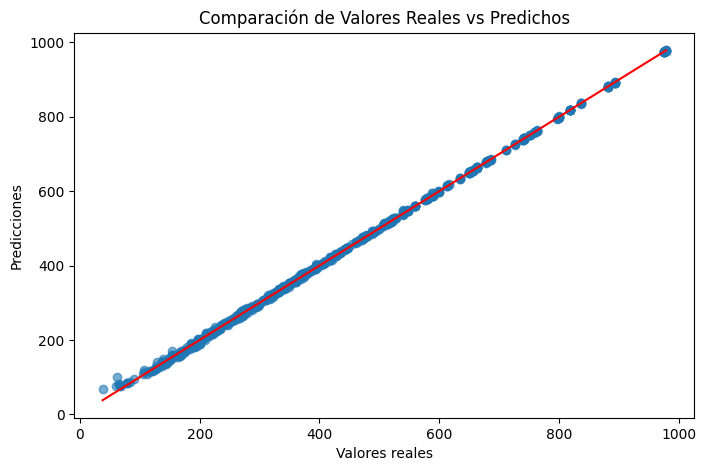

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs Predichos')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()


In [19]:
df_total = pd.concat([df1, df2], ignore_index=True)
df_total['datetime'] = pd.to_datetime(df_total['datetime'], format='mixed', errors='coerce')
df_total['date'] = df_total['datetime'].dt.date
df_total['weekday'] = df_total['datetime'].dt.weekday
ventas_por_dia = df_total.groupby(['date', 'coffee_name']).size().reset_index(name='cantidad_vendida')
ventas_pivot = ventas_por_dia.pivot(index='date', columns='coffee_name', values='cantidad_vendida').fillna(0)
df_total['is_cash'] = df_total['cash_type'].apply(lambda x: 1 if x == 'cash' else 0)
X_diario = df_total.groupby('date').agg({
    'money': 'sum',
    'is_cash': 'sum',
    'weekday': 'first'
}).rename(columns={
    'money': 'total_dinero',
    'is_cash': 'pagos_efectivo'
})
df_modelo = X_diario.join(ventas_pivot).fillna(0)
X = df_modelo[['total_dinero', 'pagos_efectivo', 'weekday']]
y = df_modelo.drop(columns=X.columns)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.save('modelo2_total.keras')
joblib.dump(scaler, 'escalador2_total.pkl')
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 1.0291 - mae: 0.3999 - val_loss: 0.9098 - val_mae: 0.3653
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8947 - mae: 0.3663 - val_loss: 0.8533 - val_mae: 0.3540
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8576 - mae: 0.3577 - val_loss: 0.7976 - val_mae: 0.3487
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8765 - mae: 0.3656 - val_loss: 0.7386 - val_mae: 0.3426
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7477 - mae: 0.3488 - val_loss: 0.6770 - val_mae: 0.3329
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6508 - mae: 0.3293 - val_loss: 0.6129 - val_mae: 0.3206
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6181 - mae: 0.3232 - val_loss: 0.5522 - val_mae: 0.3095
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5275 - mae: 0.3012 - val_loss: 0.4987 - val_mae: 0.2996
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4284 - mae: 0.2888 - val

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test_scaled)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
MAE: 0.24122580885887146
MSE: 0.35042786598205566
RMSE: 0.5919694806170802
R²: 0.0160728357732296


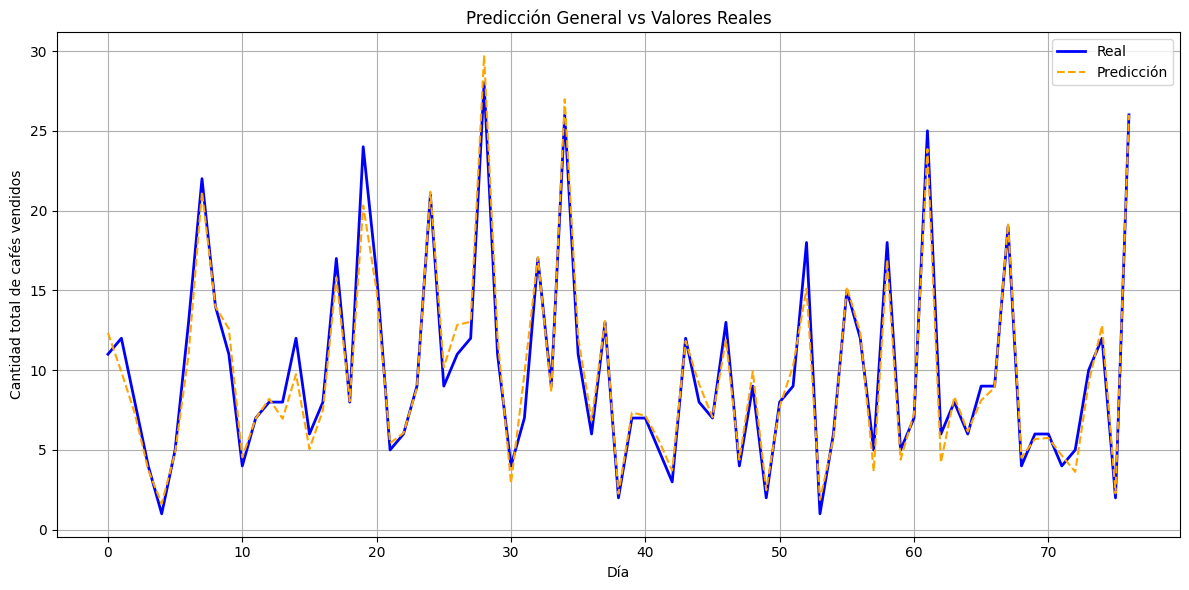

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Sumamos la cantidad total de cafés vendidos por fila (día)
real_total = y_test.sum(axis=1).reset_index(drop=True)
pred_total = pd.DataFrame(y_pred, columns=y_test.columns).sum(axis=1)

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(real_total, label='Real', color='blue', linewidth=2)
plt.plot(pred_total, label='Predicción', color='orange', linestyle='--')
plt.xlabel('Día')
plt.ylabel('Cantidad total de cafés vendidos')
plt.title('Predicción General vs Valores Reales')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
